In [1]:
# Copyright 2021 Huawei Technologies Co., Ltd
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ============================================================================
"""
k-nearest neighbor with cosine algorithm, will be used to compute accuracy in train.py
"""
import math
import numpy as np

# create a dataset which contains 4 samples with 2 classes
def createDataSet():
    group = np.array([[1.0, 0.9], [1.0, 1.0], [0.1, 0.2], [0.0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

def cosine_distance(v1, v2):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    v1_sq = np.inner(v1, v1)
    v2_sq = np.inner(v2, v2)
    dis = 1 - np.inner(v1, v2) / math.sqrt(v1_sq * v2_sq)
    return dis

def kNNClassify(newInput, dataSet, labels, k):
    """classify using kNN"""
    distance = [0] * dataSet.shape[0]
    for i in range(dataSet.shape[0]):
        distance[i] = cosine_distance(newInput, dataSet[i])
    sortedDistIndices = np.argsort(distance)
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortedDistIndices[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    maxCount = 0
    for key, value in classCount.items():
        if value > maxCount:
            maxCount = value
            maxIndex = key
    return maxIndex
    #return sortedDistIndices

In [2]:
# 载入数据
from numpy import genfromtxt
train_dataset = genfromtxt('data/train.csv',delimiter=',')
val_dataset = genfromtxt('data/val.csv',delimiter=',')
test_data = genfromtxt('data/test_data.csv',delimiter=',')
train_data = train_dataset[1:,:4]
train_label = train_dataset[1:,4]
val_data = val_dataset[1:,:4]
val_label = val_dataset[1:,4]
test_data = test_data[1:,:]

In [3]:
# 测试集预测
predict = np.zeros(len(test_data))
for i in range(len(test_data)):
    predict[i] = kNNClassify(test_data[i], train_data, train_label, 5)
print(predict)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 2. 0. 2. 2. 1. 0. 2.]


In [4]:
# 记录测试结果
import csv
with open("task3_test_prediction.csv","w", newline="") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(["index","label"])
    for i in range(len(predict)):
        writer.writerow([i,int(predict[i])])

[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.86666667 0.86666667 0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6        0.6        0.6
 0.6        0.6        0.26666667 0.2

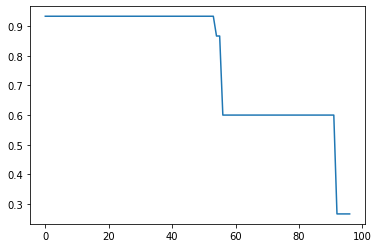

In [5]:
# 在验证集上考察k与精度的关系
import matplotlib.pyplot as plt

acc = np.zeros(97)
predict = np.zeros(len(val_label))
for k in range(1,98):
    for i in range(len(val_label)):
        predict[i] = kNNClassify(val_data[i], train_data, train_label, k)
        acc[k-1] = np.sum(predict == val_label)/len(val_data)
print(acc)
plt.plot(range(0,97),acc)
plt.show()